# Script 3 -  unsupervised clustering

# Librairies

In [48]:
install.packages("NbClust")

Installing package into ‘/home/.local/R/4.4/lib’
(as ‘lib’ is unspecified)



In [15]:
# Load required packages
library(vegan)
library(NbClust)

Loading required package: permute



# Loading data

<div style="padding: 10px; border:1px solid green; font-size: 10px;">
  <span style="font-size: 15px;"> <i>Loading the data from Doubs</i> </span><br/>
</div>


In [12]:
# load data ---------------------------------------------------------------
load("Doubs.RData")  

# 0 Selection of a resemblance criteria -> ***(Dis) similarity** or **distance matrix***

- **Unsupervised clustering** is a data exploration technique used to **identify natural groupings** or gradients in a dataset **without any prior assumptions or labels**. </br>

- The results are entirely driven by the internal structure of the data and can vary depending on the **chosen similarity/distance metric** and **clustering algorithm**. </br>

<div align="center"> <h1 style="font-size: 15pt;">The first step is to select an appropriate <b>resemblance criterion</b>, such as a dissimilarity or distance measure, to capture how similar or different the objects are.</h2> </div>


## 0.1 Data processing : remove empty sites 

In [13]:
# Remove empty site 8
spe <- spe[-8, ]
env <- env[-8, ]
spa <- spa[-8, ]
latlong <- latlong[-8, ]

## 0.2 Compute chord distance matrix 

In [16]:
# Compute matrix of euclidian distances of the normalized datas among sites
spe.norm <- decostand(spe, "normalize") # normalize datas
spe.ch <- vegdist(spe.norm, "euc") # calculate the chord distance matrix

## 0.3 Showing chord distance matrix with dendograms

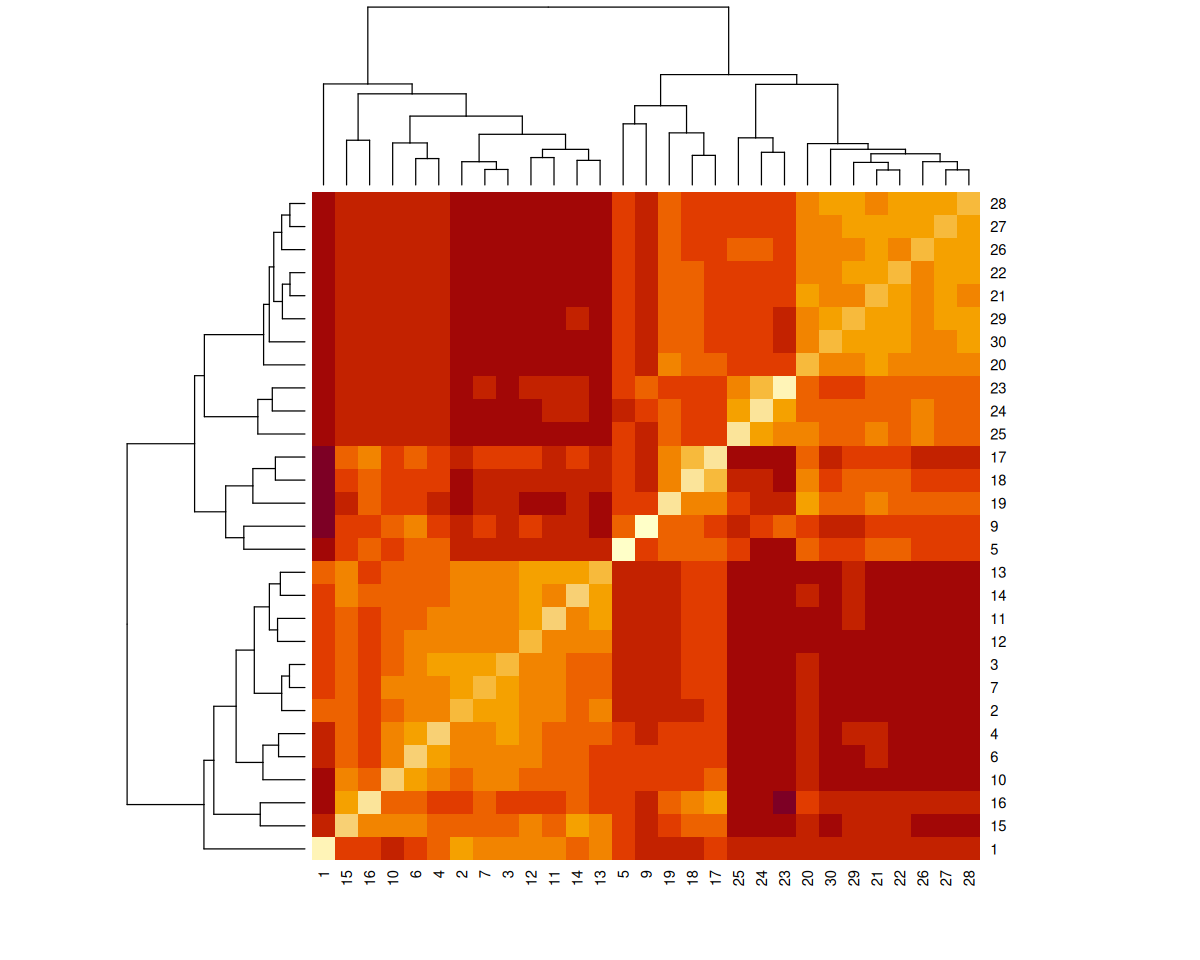

In [17]:
heatmap(as.matrix(spe.ch))

# 1  Hierarchical agglomerative clustering (maintain hierarchy of similarity within group)

<div style="display: flex; justify-content: space-around;">
    <img src="images/hierarchical clustering.png" width="35%">
    <img src="images/dendogram.png" width="35%">

</div>

## 1.0 Compute and plot hierarchical clustering

### 1.0.1 Hierarchical clustering computation -> ***hclust**( df_dist, method=)*

*Performs hierarchical cluster analysis on a distance matrix.* 

- **`df_dist`** → *Distance matrix*  
- **`method`** → *Agglomeration method*:  
  - `"complete"`: Complete linkage (default)  
  - `"single"`: Single linkage  
  - `"average"`: UPGMA (Unweighted Pair Group Method with Arithmetic mean)  
  - `"ward.D2"`: Ward's minimum variance method

### 1.0.2 Dendrogram Visualization → ***plot**( hc, hang, cex, main, xlab, ylab,sub,horiz)*

*Plots hierarchical clustering dendrograms with customizable formatting.*

- **hc** : *hclust object*
- **hang** : *Leaf heights*
- **cex** : *label size*
- **main** : *Title*
- **xlab** : X-axis label
- **ylab** : y-axis label
- **sub** : `Null`/`"Subtitle"` Subtitle
- **horiz** : `False`/`True` *horizontal plot*

## 1.1 Single linkage agglomerative clustering -> *hclust(df_dist,method ="single")*

<div style="padding: 10px; border:5px solid green; font-size: 10px; text-align: center;">
    <img src="images/Single Linkage_1.png" width="35%">
    <img src="images/Single Linkage.png" width="35%">
    <div style="margin-top: 20px; font-size: 22px; font-weight: bold;">
        Distance between clusters is defined by the distance between their closest members.
    </div>
</div>


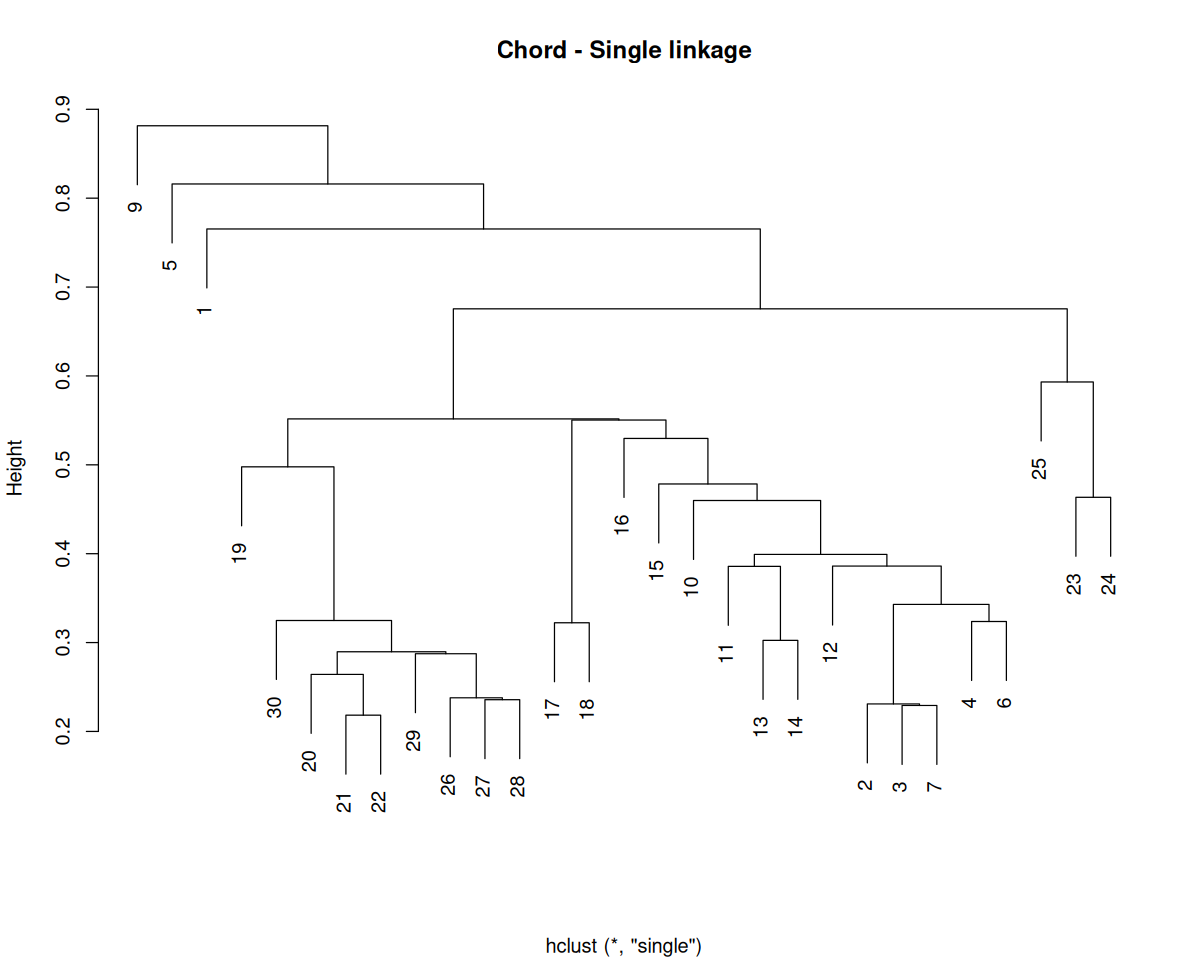

In [18]:
# Compute single linkage agglomerative clustering
spe.ch.single <- hclust(spe.ch, method = "single")
# Plot the dendrogram using default options
plot(spe.ch.single, main = "Chord - Single linkage", xlab="")


## 1.2 Complete-linkage agglomerative clustering -> *hclust(df_dist,method ="complete")*

<div style="padding: 10px; border:5px solid green; font-size: 10px; text-align: center;">
    <img src="images/Complete Linkage.png" width="35%">
    <div style="margin-top: 20px; font-size: 22px; font-weight: bold;">
        Distance between clusters is defined by the distance between their furthest members.
    </div>
</div>


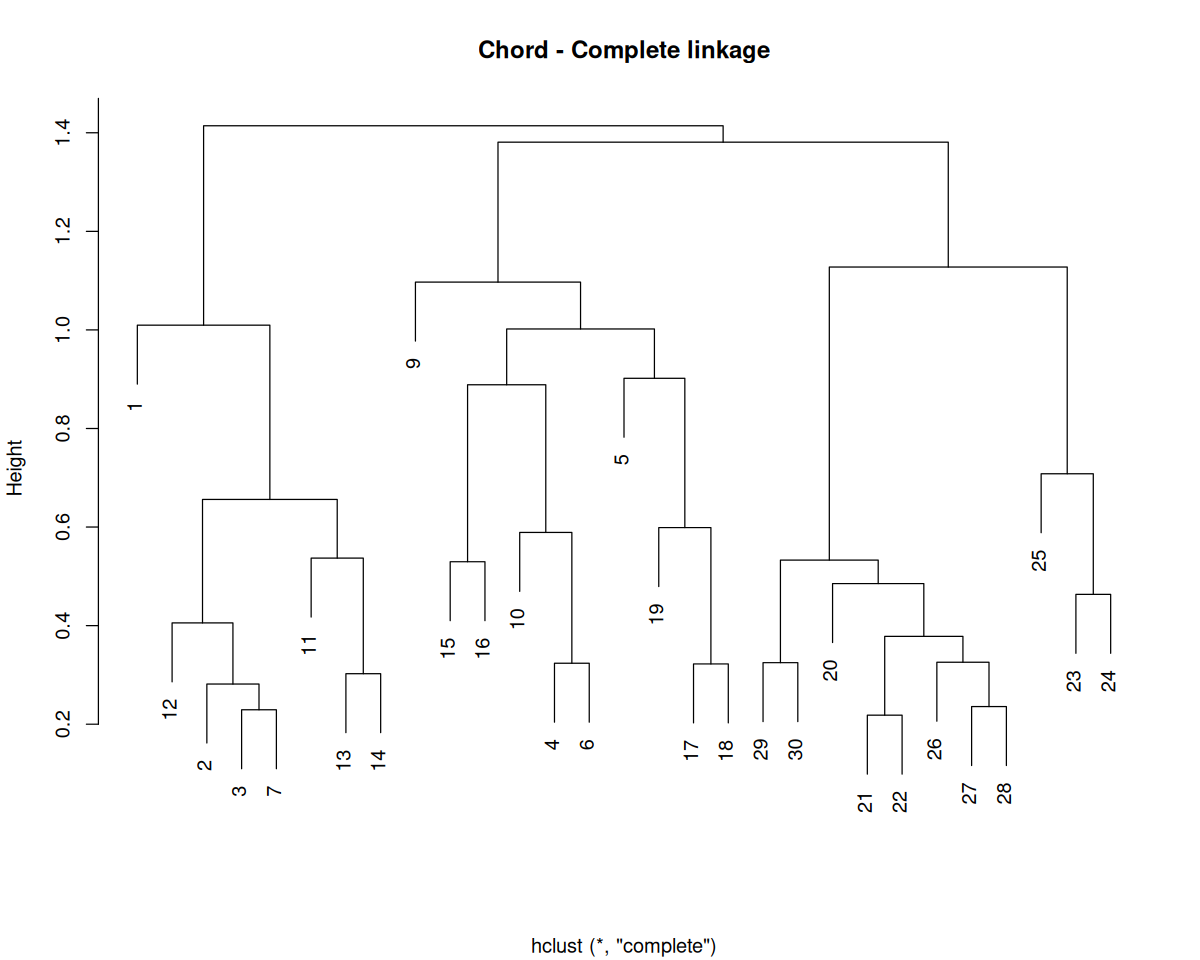

In [19]:
# Compute and plot complete-linkage agglomerative clustering
spe.ch.complete <- hclust(spe.ch, method = "complete")
plot(spe.ch.complete, main = "Chord - Complete linkage", xlab="")

## 1.3 UPGMA clustering -> *hclust(df_dist,method ="average")*

<div style="padding: 10px; border:5px solid green; font-size: 10px; text-align: center;">
  <img src="images/UPGMA.png" width="55%" style="margin-right:10px;">
  <img src="images/AverageLinkage.png" width="35%">
  <div style="margin-top: 20px; font-size: 20px; font-weight: bold;">
    The percentage of the number of points of each cluster is calculated with respect to the number of points of the two clusters if they were merged.
  </div>
</div>


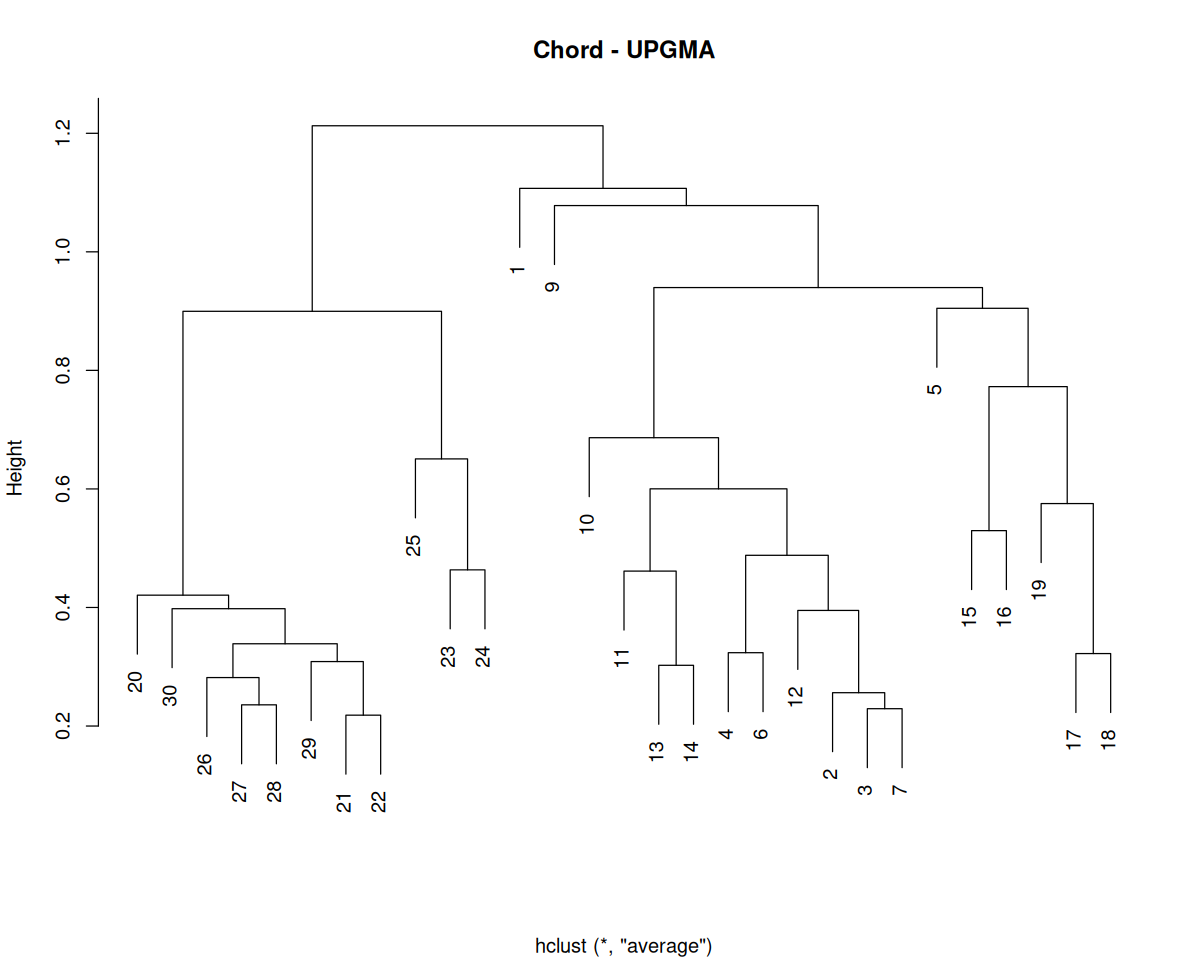

In [20]:
# Compute and plot UPGMA agglomerative clustering
spe.ch.UPGMA <- hclust(spe.ch, method = "average")
plot(spe.ch.UPGMA, main = "Chord - UPGMA", xlab="")

## 1.4 UPGMC clustering -> *hclust(df_dist,method ="centroid")*

<div style="padding: 10px; border:5px solid green; font-size: 10px;">
    <img src="images/UPGMC.png" width="57%">
    <img src="images/CentroidLinkage.png" width="35%">
    <div style="margin-top: 20px; font-size: 20px; font-weight: bold; text-align: center;">
   Distance is defined as the Euclidean distance between the centroids (means) of two clusters. The position of the new centroid is updated at each merge.
</div>
</div>



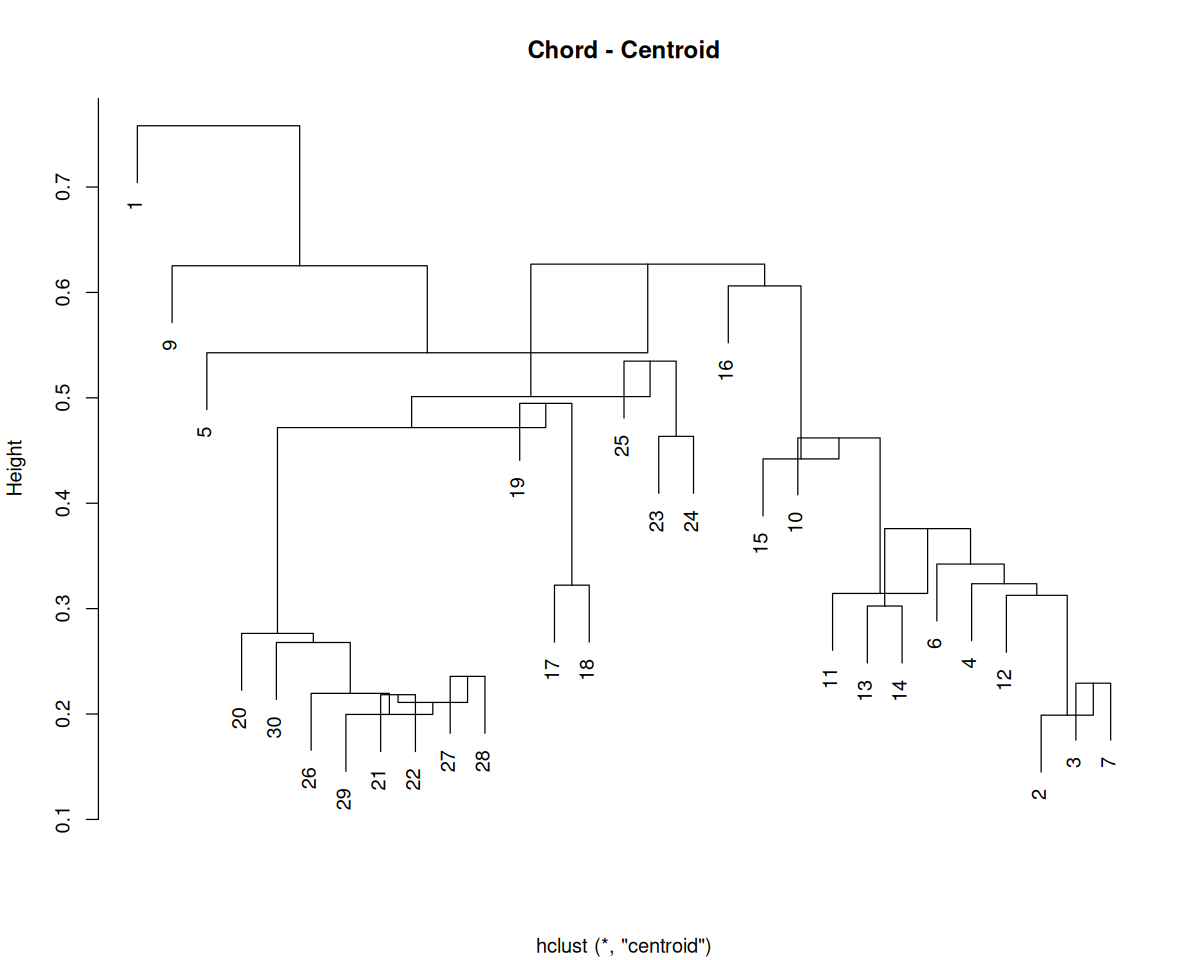

In [21]:
# Compute and plot UPGMC agglomerative clustering
spe.ch.centroid <- hclust(spe.ch, method = "centroid")
plot(spe.ch.centroid, main = "Chord - Centroid", xlab="")

## 1.5 Ward's minimum variance clustering -> ***hclust**(df_dist,method ="ward.D2")*

<div style="padding: 10px; border:5px solid green; font-size: 10px; text-align: center;">
  <img src="images/wardLinkage.png" width="47%">
  <div style="margin-top: 20px; font-size: 20px; font-weight: bold;">
    Specifies the distance between two clusters, computes the sum of squares error (ESS), and successively chooses the next clusters based on the smaller ESS.
  </div>
</div>


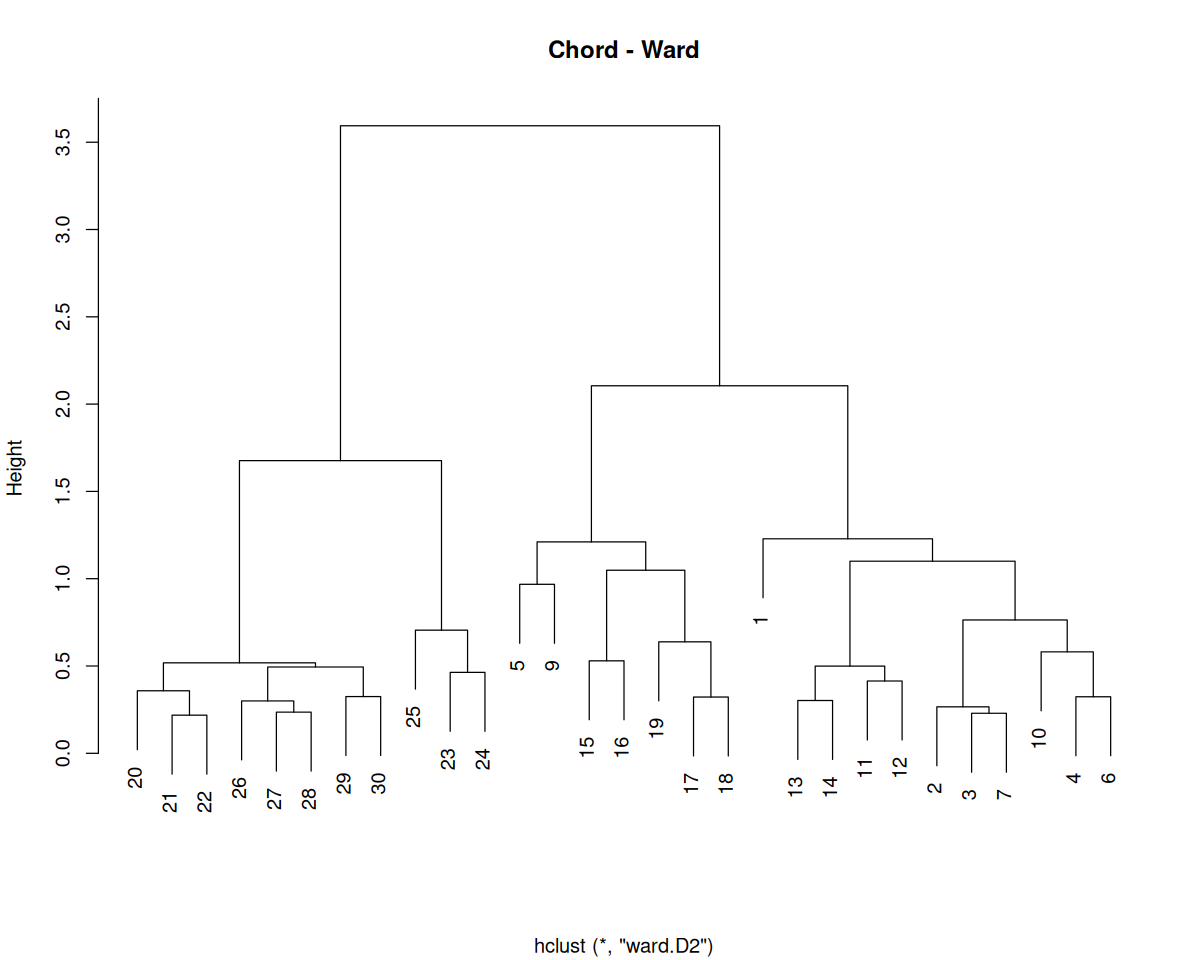

In [22]:
# Compute and plot Ward's minimum variance agglomerative clustering
spe.ch.ward <- hclust(spe.ch, method = "ward.D2")
plot(spe.ch.ward,  main = "Chord - Ward", xlab="")

<div style="padding: 10px; border:1px solid red; font-size: 18px; position: relative;">
  <span style="text-decoration:underline; font-weight: bold; font-size: 22px;">Question 1</span><br/>

  <div style="display: flex; align-items: flex-start;">
    <div style="flex: 1;">
        Here is an example of UPGMC derived from a distance matrix between several samples. <br/><br/><br/><br/>
        <strong>Which statements are correct? </strong>
    </div>
    <div style="margin-left: 20px;">
      <img src="images/UPGMC_Exemple.png" alt="Skewed distribution" style="max-width: 500px; height: auto; border: 1px solid #ccc;" />
    </div>
  </div>

<form>
  <label><input type="radio" name="q5" value="1"> 1) In the first iteration, the two centroids are point 1 and point 2</label><br/>
  <label><input type="radio" name="q5" value="2"> 2) The first centroid is closer to point 4 than to point 3</label><br/>
  <label><input type="radio" name="q5" value="3"> 3) The distance between the first centroid (created from point 1 and point 2) and point 3 is approximately 6.3</label><br/>
  <label><input type="radio" name="q5" value="4"> 4) The distance between point 4 and the centroid formed by points 1, 2, and 3 is 9.4</label><br/>
  <label><input type="radio" name="q5" value="5"> 5) The distance between point 1 and point 2 to form the first centroid is approximately 6.3</label><br/>
  <label><input type="radio" name="q5" value="6"> 6) The distance between point 1 and point 4 is 9.4</label>
</form>

</div>

<details style="font-size: 18px;">
  <summary style="font-size: 20px; font-weight: bold; text-decoration: underline;">Answer</summary>
  <div style="padding: 10px; border:1px solid blue; font-size: 20px;">

<form>
  <label style="color: blue;"><input type="radio" name="q5" value="squaring"> 1) In the first iteration, the two centroids are point 1 and point 2</label><br/>
  <label><input type="radio" name="q5" value="2"> 2) The first centroid is closer to point 4 than to point 3</label><br/>
  <label style="color: blue;"><input type="radio" name="q5" value="squaring"> 3) The distance between the first centroid (created from point 1 and point 2) and point 3 is approximately 6.3</label><br/>
  <label style="color: blue;"><input type="radio" name="q5" value="squaring"> 4) The distance between point 4 and the centroid formed by points 1, 2, and 3 is 9.4</label><br/>
  <label><input type="radio" name="q5" value="5"> 5) The distance between point 1 and point 2 to form the first centroid is approximately 6.3</label><br/>
  <label><input type="radio" name="q5" value="6"> 6) The distance between point 1 and point 4 is 9.4</label>
</form>

  </div>
</details>


# 2 Non-hierarchical (Partition) clustering 

<div style="display: flex; justify-content: space-around;">
    <img src="images/non_hierarchical_clustering.png" width="45%">
    <img src="images/kmeans.png" width="45%">
</div>


*Source : Divakar, K-Means Clustering, Medium, 2023. https://medium.com/@divakar1591/k-means-clustering-fe4684e89df9*

## 2.0 Compute and plot K-means clustering -> ***kmeans()***

### 2.0.1 k-means clustering computation -> ***kmeans**(df_dist,centers =,iter.max=)*

*Performs k-means partitioning clustering on a distance matrix.*
- **`df_dist`** : distance matrix
- **`centers`** : Number of clusters (k) to create
- **`iter.max`** : Maximum iterations

***outputs*** :

- **K-means clustering** : with ***m*** clusters of sizes ***n<sub>1</sub>***, ***n<sub>2</sub>***, ***n<sub>3</sub>***, ..., ***n<sub>m</sub>***
  
- **Cluster Means** : Each row = a cluster, Each column = a variable, The values = mean value of that variable in that cluster

- **Clustering vector** :  Tells which cluster each data point belongs to.

- **Within cluster sum of squares by cluster** : Measures how tight the points are within each cluster.

- ***Available components***:
  - - `cluster`: cluster membership vector  
  - - `centers`: cluster centers (means)  
  - - `totss`: total sum of squares  
  - - `withinss`: within-cluster sum of squares by cluster  
  - - `tot.withinss`: total within-cluster sum of squares  
  - - `betweenss`: between-cluster sum of squares  
  - - `size`: sizes of clusters  
  - - `iter`: number of iterations performed  
  - - `ifault`: error code (0 if no error)  



### 2.0.2 k-means Visualization -> ***plot**(df, col = kmean_obj$cluster,pch,main,xlab,ylab)*

Visualizes k-means clustering results in 2D/3D space with cluster boundaries.

- **`df`** : *dataframe matrix*
- **`kmean_obj`** : *k-mean object created with the distance matrix*
- **`pch`** : *Point style*
- **`Main`** : *Title*
- **`xlab`** : *x-axis label*
- **`ylab`** : *y-axis label*

## 2.1 K-means clustering

In [25]:
#k-means clustering (non-hierarchical)
spe.ch.k<-  kmeans(spe.ch, centers=3)
spe.ch.k

K-means clustering with 3 clusters of sizes 11, 12, 6

Cluster means:
          1         2         3         4        5         6         7
1 1.4107253 1.3887658 1.3692498 1.2739314 1.004302 1.2017123 1.3517916
2 0.9068203 0.4954597 0.4844693 0.5417547 1.067183 0.5784449 0.4812705
3 1.3230235 1.0999961 1.0504975 0.9477804 0.748270 0.8415178 1.0091778
          9        10       11        12       13       14        15        16
1 1.1038601 1.2690111 1.363769 1.3658836 1.393568 1.328136 1.2342588 1.1561019
2 1.1348576 0.6779791 0.558652 0.4808317 0.571016 0.575236 0.6644242 0.8934415
3 0.8408263 0.8956542 1.089656 1.0531068 1.110418 1.016812 0.8590573 0.6766939
         17        18        19        20        21        22       23
1 0.9905818 0.8523994 0.7696860 0.5010256 0.4445614 0.4560813 0.842928
2 0.9389334 1.0244417 1.0894911 1.2652583 1.3005764 1.3222405 1.374404
3 0.5702668 0.5717185 0.6238873 0.7968633 0.8722581 0.9057062 1.150469
         24       25        26        27      

<div style="padding: 12px; border: 2px solid red; font-size: 18px;">
  <span style="text-decoration: underline; font-weight: bold; font-size: 22px;">Question 2</span><br/><br/>

  1) Load the <code>Sample_Location.csv</code> file and store it in a variable named <code>Sample_Location</code>.<br/><br/>

  2) Each row in the dataset represents a sample, and the columns correspond to its <code>x</code> and <code>y</code> coordinates. Compute the pairwise Euclidean distances between all sample locations.<br/><br/>

  3) Perform k-means clustering on the ditsance matrix computed in 2. with 8 clusters<br/><br/>

  4) Based on the clustering result, report:<br/>
  - The total number of clusters<br/>
  - The size of each cluster<br/><br/>

  5) Create a scatter plot of the sample locations where each point is colored according to its assigned cluster.
</div>


In [ ]:
# 1) Read the CSV file into a dataframe named Sample_Location (hint: use read.csv())
Sample_Location <- _____("Sample_Location.csv")
Sample_Location


<details style="font-size: 18px;">
  <summary style="font-size: 20px; font-weight: bold; text-decoration: underline;">1) Answer</summary>
  <div style="padding: 10px; border:1px solid blue; font-size: 20px;">
    <code> Sample_Location <- <span style="color:blue;">read.csv</span>("Sample_Location.csv") </code><br/>
  </div>
</details>


In [ ]:
# 2)  Compute the pairwise Euclidean distances between all sample locations.

# ( hint : use dist() )
Sample_Location.de <- _____(Sample_Location)


<details style="font-size: 18px;">
  <summary style="font-size: 20px; font-weight: bold; text-decoration: underline;">2) Answer</summary>
  <div style="padding: 10px; border:1px solid blue; font-size: 20px;">
    <code> Sample_Location.de <- <span style="color:blue;">dist</span>(Sample_Location) </code><br/>
  </div>
</details>


In [ ]:
# 3) Perform k-means clustering on the ditsance matrix 

# k-means clustering (non-hierarchical) with 8 centers (hint : use kmeans())
Sample_Location.de.k<-  _____(Sample_Location.de, centers=____)



<details style="font-size: 18px;">
  <summary style="font-size: 20px; font-weight: bold; text-decoration: underline;">3) Answer</summary>
  <div style="padding: 10px; border:1px solid blue; font-size: 20px;">
    <code> Sample_Location.de.k<- <span style="color:blue;">kmeans</span>(Sample_Location.de, centers= <span style="color:blue;">8 </span>)</code><br/>
  </div>
</details>


In [ ]:
# 4) Display details of the kmeans clustering
Sample_Location.de.k

<details style="font-size: 18px;">
  <summary style="font-size: 20px; font-weight: bold; text-decoration: underline;">4) Answer</summary>
  <div style="padding: 10px; border:1px solid blue; font-size: 20px;">
    <img src="images/Script3_Q2.png" alt="kmeans code" style="max-width:100%;">
  </div>
</details>


In [ ]:
# 5) Create a scatter plot of the sample locations where each point is colored according to its assigned cluster.

# Set plot size in Jupyter Notebook (10 x 8 inches)
options(repr.plot.width = 10, repr.plot.height = 8)

plot(Sample_Location$X, Sample_Location$Y, col = ________$cluster, pch = 16, cex = 1.5) # hint use the kmean_obj created  

<details style="font-size: 18px;">
  <summary style="font-size: 20px; font-weight: bold; text-decoration: underline;">5) Answer</summary>
  <div style="padding: 10px; border:1px solid blue; font-size: 20px;">
    <code> plot(Sample_Location$X, Sample_Location$Y, col =<span style="color:blue;"> Sample_Location.de.k$cluster</span>,pch = 16, cex = 1.5) </code><br/>
    <img src="images/Script3_Q2_plot.png" alt="kmeans code" style="max-width:100%;">
  </div>
</details>


# 3 Cophenetic correlation 

> The **cophenetic correlation** coefficient (or simply cophenetic correlation) is a measure used in  **assess** how well a **dendrogram** **preserves** the **original pairwise distances** between **data points**. It essentially **quantifies** the **similarity** between the **original distances** used to create the dendrogram and the "cophenetic **distances" derived from the dendrogram.**

<div style="display: flex; justify-content: space-around;">
    <img src="images/Cophenetic matrix.png" width="55%" style="border: 3px solid green; padding: 7px;">
</div>


## 3.0 Cophenetic Distance and correlation Computation → *cophenetic(hc), cor(df_dist,cophenetic_dist)*

Used to evaluate how well the hierarchical clustering preserves the original pairwise distances.

- **hc** : *hierarchical clustering object from a distance matrix*
- **df_dist** : *distance matrix*
- **cophenetic_dist** : *cophenetic distance*

### 3.0.1 Compute the cophenetic distance matrix -> *cophenetic(hc)*

- **cophenetic_dist <- cophenetic(hc)** : *Compute the cophenetic distance matrix (ultrametric distances from the dendrogram)*

### 3.0.2 Compute the correlation between the cophenetic distance matrix and the distance matrix -> *cor(df_dist,cophenetic_dist)*

- **cor(copehenetic_dist,df_dist)** : *Compute the correlation between the original and cophenetic distances*

## 3.1 Single linkage clustering Cophenetic Correlation

In [23]:
# Compute the cophenetic distance matrix from the dendrogram obtained with single linkage clustering
spe.ch.single.coph <- cophenetic(spe.ch.single)

# Compute the cophenetic correlation between the original dissimilarities and the dendrogram
cor(spe.ch, spe.ch.single.coph)

[1] 0.599193

## 3.2 Complete linkage clustering Cophenetic Correlation

In [24]:
# Compute the cophenetic distance matrix from the dendrogram obtained with complete linkage clustering
spe.ch.comp.coph <- cophenetic(spe.ch.complete)

# Compute the cophenetic correlation for complete linkage
cor(spe.ch, spe.ch.comp.coph)

[1] 0.7655628

## 3.3 UPGMA clustering Cophenetic Correlation

In [25]:
# Compute the cophenetic distance matrix from the dendrogram obtained with Average clustering
spe.ch.UPGMA.coph <- cophenetic(spe.ch.UPGMA)

# Compute the cophenetic correlation for Average clustering
cor(spe.ch, spe.ch.UPGMA.coph)

[1] 0.8608326

## 3.4 Ward's minimum variance clustering Cophenetic Correlation

In [26]:
# Compute the cophenetic distance matrix from the dendrogram obtained with Ward clustering
spe.ch.ward.coph <- cophenetic(spe.ch.ward)

# Compute the cophenetic correlation for Ward clustering
cor(spe.ch, spe.ch.ward.coph)

[1] 0.7998516

<div style="padding: 10px; border:1px solid red; font-size: 18px; position: relative;">
  <span style="text-decoration: underline; font-weight: bold; font-size: 22px;">Question 3</span><br/>


  <div style="margin-top: 10px; margin-bottom: 20px; line-height: 1.5;">
    After applying 5 different unsupervised clustering methods on a distance matrix, we obtain the following cophenetic correlations.<br/><br/>
    <img src="images/Script3_Q3.png" alt="Cophenetic Correlations" style="max-width: 40%; height: auto; margin-bottom: 15px;"> <br/>
    <strong>Which of the following statements are correct?</strong>
  </div>

<form>
  <label><input type="radio" name="q5" value="1"> 1) The UPGMA clustering method best preserves the original distances from the distance matrix.</label><br/>
  <label><input type="radio" name="q5" value="1"> 2) The Complete Linkage clustering method best preserves the original distances from the distance matrix.</label><br/>
  <label><input type="radio" name="q5" value="2"> 3) The Ward method is the least accurate.</label><br/>
  <label><input type="radio" name="q5" value="3"> 4) A cophenetic correlation of zero for the UPGMC method means there is no difference between the dendrogram distances and the original distance matrix.</label><br/>
  <label><input type="radio" name="q5" value="3"> 5) The dendrogram produced by the UPGMC method shows distances that are completely different from the original distance matrix values.</label><br/>
</form>


<details style="font-size: 18px; margin-top: 15px;">
  <summary style="font-size: 20px; font-weight: bold; text-decoration: underline; cursor: pointer;">Answer</summary>
  <div style="padding: 10px; border:1px solid blue; font-size: 20px; margin-top: 10px;">
<form>
  <label><input type="radio" name="q5" value="1"> 1) The UPGMA clustering method best preserves the original distances from the distance matrix.</label><br/>
  <label style="color: blue;"><input type="radio" name="q5" value="squaring">  2) The Complete Linkage clustering method best preserves the original distances from the distance matrix.</label><br/>
  <label><input type="radio" name="q5" value="2"> 3) The Ward method is the least accurate.</label><br/>
  <label><input type="radio" name="q5" value="3"> 4) A cophenetic correlation of zero for the UPGMC method means there is no difference between the dendrogram distances and the original distance matrix.</label><br/>
  <label style="color: blue;"><input type="radio" name="q5" value="squaring">  5) The dendrogram produced by the UPGMC method shows distances that are completely different from the original distance matrix values.</label><br/>
</form>
  </div>
</details>


# Homework : Task 1

<div style="padding: 10px; border:1px solid red; font-size: 18px;">
  <span style="text-decoration:underline; font-weight: bold; font-size: 22px;">HOMEWORK : TASK 1</span><br/>
  Use the oribatide mite dataset, calculate a similarity measure and perform clustering analysis.<br/>
  <ol>
    <li> Use the oribatide mite dataset, import it in the environnement and calculate chord distance among samples </li>
    <li> Show dendogram using single linkage, complete linkage, UPGMA, UPGMC and Ward</li>
    <li> Based on visual inspection of the dendrogram - which clustering algorithm produces the "best" results?</li>
    <li> How many groups of sites - based on mite community similarity are there ? </li>
    <li> Log transform the data and then the calculate simlarity measure again </li>
    <li>  Show dendogram using single linkage, complete linkage, UPGMA, UPGMC and Ward and explore the impact of log-transformation of mite abundances on the cluster analysis  </li>
      
  </ol>
  <p style="text-align: right; margin-bottom: 0px; font-style: italic;">
    Answer these questions based on your analysis.
  </p>
</div>


In [ ]:
## Q1 Use the oribatide mite dataset, import it in the environnement and calculate chord distance among samples

# your code here :


# Read the CSV file 
oribatide_mite <- _____("oribatide_mite.csv", row.names = 1)

# Normalize the data so that each sample vector length equals 1 (unit length),
# which is necessary for calculating chord distance (hint : use decostand() )
oribatide_mite.norm <- _____(oribatide_mite, method = "normalize")

# Compute the chord distance matrix between samples based on normalized data.
# Chord distance is the Euclidean distance between normalized vectors (unit length) (hint : use vegdist())
oribatide_mite.ch <- _____(oribatide_mite.norm, method = "euclidean")

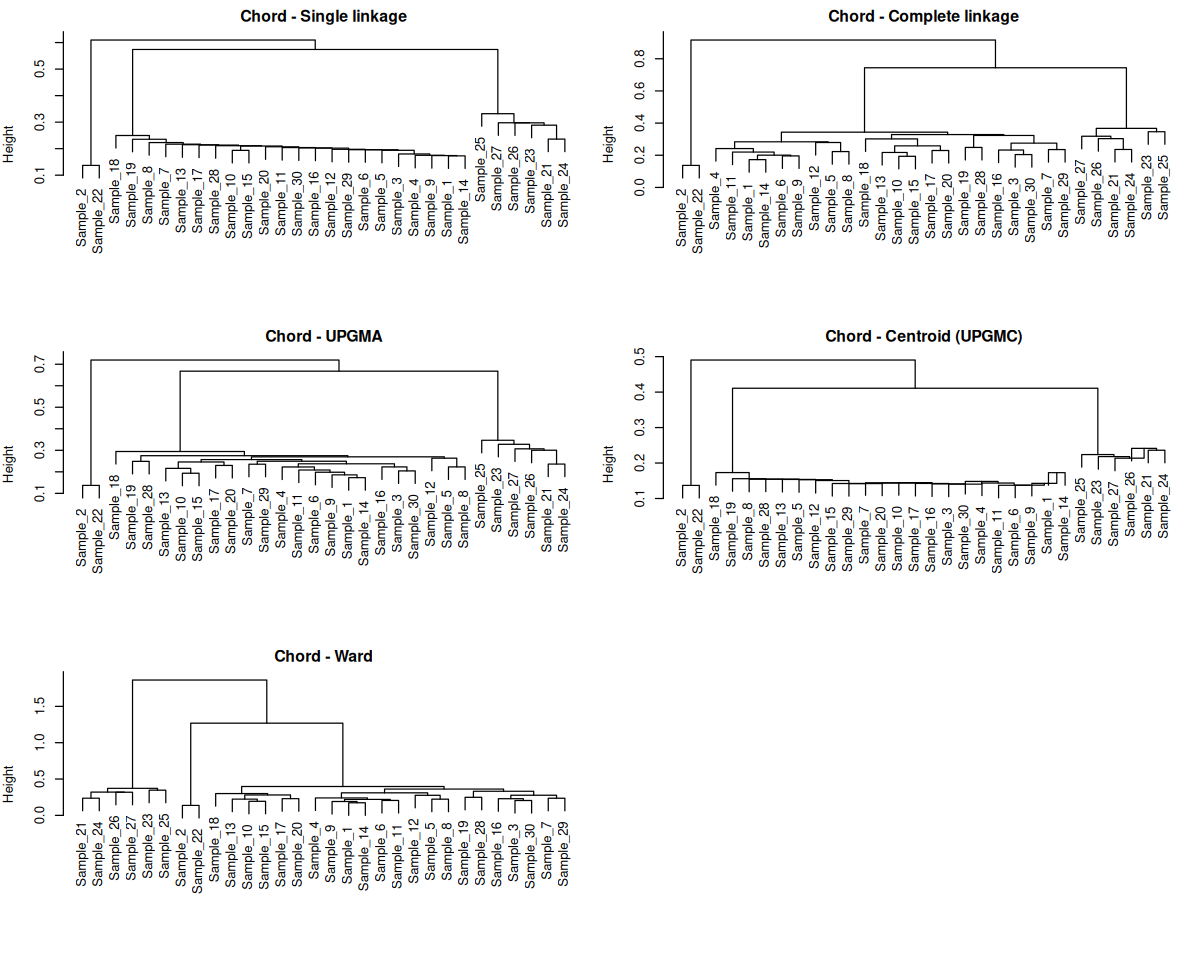

In [56]:
par(mfrow = c(3, 2), mar = c(4, 4, 2, 1))  # 3 rwos, 2 columns

# Compute single linkage agglomerative clustering
oribatide_mite.ch.single <- hclust(oribatide_mite.ch, method = "single")
plot(oribatide_mite.ch.single, main = "Chord - Single linkage", xlab="")

# Compute and plot complete-linkage agglomerative clustering
oribatide_mite.ch.complete <- hclust(oribatide_mite.ch, method = "complete")
plot(oribatide_mite.ch.complete, main = "Chord - Complete linkage", xlab="")

# Compute and plot UPGMA agglomerative clustering (average linkage)
oribatide_mite.ch.UPGMA <- hclust(oribatide_mite.ch, method = "average")
plot(oribatide_mite.ch.UPGMA, main = "Chord - UPGMA", xlab="")

# Compute and plot UPGMC agglomerative clustering (centroid linkage)
oribatide_mite.ch.centroid <- hclust(oribatide_mite.ch, method = "centroid")
plot(oribatide_mite.ch.centroid, main = "Chord - Centroid (UPGMC)", xlab="")

# Compute and plot Ward's minimum variance agglomerative clustering
oribatide_mite.ch.ward <- hclust(oribatide_mite.ch, method = "ward.D2")
plot(oribatide_mite.ch.ward, main = "Chord - Ward", xlab="")


In [ ]:
##Q3: explore the impact of log-transformation of mite abundances on the cluster analysis? (hint : )
# your code here :


In [40]:
##Q4 What does this tell us in terms of the importance of abundant mite species for the overall structure of the mite community?
# your code here

# 4 Shepard Diagrams

> *A Shepard diagram **compares** **original** **dissimilarities** against **cophenetic distances from hierarchical clustering**. The **tighter the points align around the 1:1 reference line**, the **better the clustering preserves** the **original distance** structure. Deviations reveal distortions introduced by the clustering algorithm.*

<div style="display: flex; justify-content: space-around;">
    <img src="images/shepard_distance.png" width="50%"style="border: 3px solid green; padding: 7px;">
</div>

## 4.0 Shepard Diagram visualization → *plot(df_dist,cophenetic_dist), lines(lowess(df_dist, cophenetic_dist), col = "red", lwd = 3)*

The Shepard diagram visualizes the relationship between the original distance matrix and the cophenetic distances from a hierarchical clustering.

- **df_dist** : *distance matrix*
- **cophenetic_dist** : *copehenetic distance matrix*
- **abline(0,1)** : *Add a 1:1 reference line (ideal match between distances)*
- **lines(lowess(df_dist, cophenetic_dist), col = "red", lwd = 3)** : *Add a LOWESS (locally weighted scatterplot smoothing) curve to visualize the trend*


## 4.1 Single linkage clustering

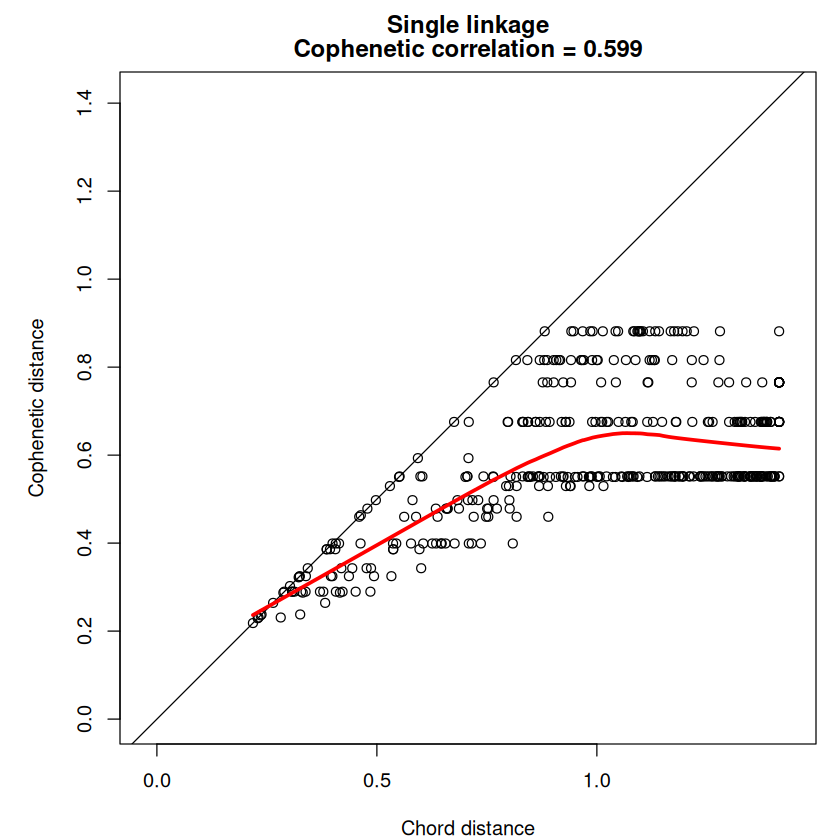

In [43]:
# Shepard diagram ---------------------------------------------------------
par(mfrow=c(1,1), mar=c(4,5,3,1))

plot(spe.ch, spe.ch.single.coph, #initial chord distance against cophenetic distance from single linkage clustering
  xlab = "Chord distance",
  ylab = "Cophenetic distance",
  asp = 1, xlim = c(0, sqrt(2)),
  ylim = c(0, sqrt(2)),
  main = c("Single linkage", paste("Cophenetic correlation =", round(cor(spe.ch, spe.ch.single.coph), 3))))
abline(0, 1)  # Add a 1:1 reference line (ideal match between distances)
lines(lowess(spe.ch, spe.ch.single.coph), col = "red", lwd=3) # Add a LOWESS (locally weighted scatterplot smoothing) curve to visualize the trend

# 5 Optimal number of clusters -> *NbClust()*

### 5.0.2 Optimal number of clusters → *NbClust(df, diss= df_dist,distance = NULL, min.nc =, max.nc =, method=,index =)*

*Determines the optimal number of clusters using various statistical indices.*

- **df** : *Raw data matrix* (rows = observations, columns = variables)   
- **df_dist** : *Distance matrix*,(only used if `diss = NULL`)  
- **method** : *Clustering method*:  
  - "complete": Complete linkage  
  - "single": Single linkage  
  - "average": UPGMA  
  - "ward.D2": Ward's minimum variance method  
- **min.nc, max.nc** : *Range of cluster numbers to test (min to max)*  
- **index** : *Evaluation index*, e.g., `"ch"` (Calinski-Harabasz), `"silhouette"`, `"gap"`, etc.


**Output**  :

- **`Nb.result$All.index`**  
  - A numeric vector containing the values of the evaluation index for **all** tested cluster numbers (from `min.nc` to `max.nc`)  
  - Useful to plot the index curve and visualize which number of clusters is best
  - 
- **`Nb.result$Best.nc`**  
  - A list containing:  
    - `Number_clusters` → The optimal number of clusters determined by the chosen index  
    - `Value_Index` → The value of the evaluation index at the optimal number of clusters
    - 
- **`Nb.result$Best.partition`**  
  - A vector assigning each observation in the data to one of the clusters in the optimal partition  
  - Each element corresponds to the cluster label for that observation  


### 5.0.2 Plot the optimal number of clusters -> *plot(x,Nb.single$All.index)*

*Determines the optimal number of clusters using various statistical indices.*

- **x** : *Range of cluster numbers to test (min to max)*  
- **Nb.single$All.index** : *Evaluation index values (y)*  

## 5.1 Find optimal number of clusters for the Single Linkage Clustering 

In [50]:
Nb.single <- NbClust(
  spe,                # Input Spe matrix 
  diss = spe.ch,      #  Chord distance matrix for spe
  distance = NULL,    # Distance metric is NULL because we provide 'diss' directly
  min.nc = 2,         # Minimum number of clusters to test (start at 2)
  max.nc = 16,        # Maximum number of clusters to test (up to 16)
  method = "single",  # Clustering linkage method: single linkage here
  index = "ch"        # Evaluation criterion: Calinski-Harabasz index
)

In [52]:
Nb.single  # Displays the output from NbClust, including the suggested optimal number of clusters and clustering indices for all tested cluster counts

$All.index
      2       3       4       5       6       7       8       9      10      11 
 0.6796  0.7581  0.7531  1.0773  0.8409  8.5882  9.1594  9.2087 10.1703  9.8839 
     12      13      14      15      16 
 8.8171  8.2062  8.2693  7.4850  7.0619 

$Best.nc
Number_clusters     Value_Index 
        10.0000         10.1703 

$Best.partition
 1  2  3  4  5  6  7  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25 26 27 
 1  2  2  2  3  2  2  4  2  2  2  2  2  2  5  6  6  7  8  8  8  9  9 10  8  8 
28 29 30 
 8  8  8

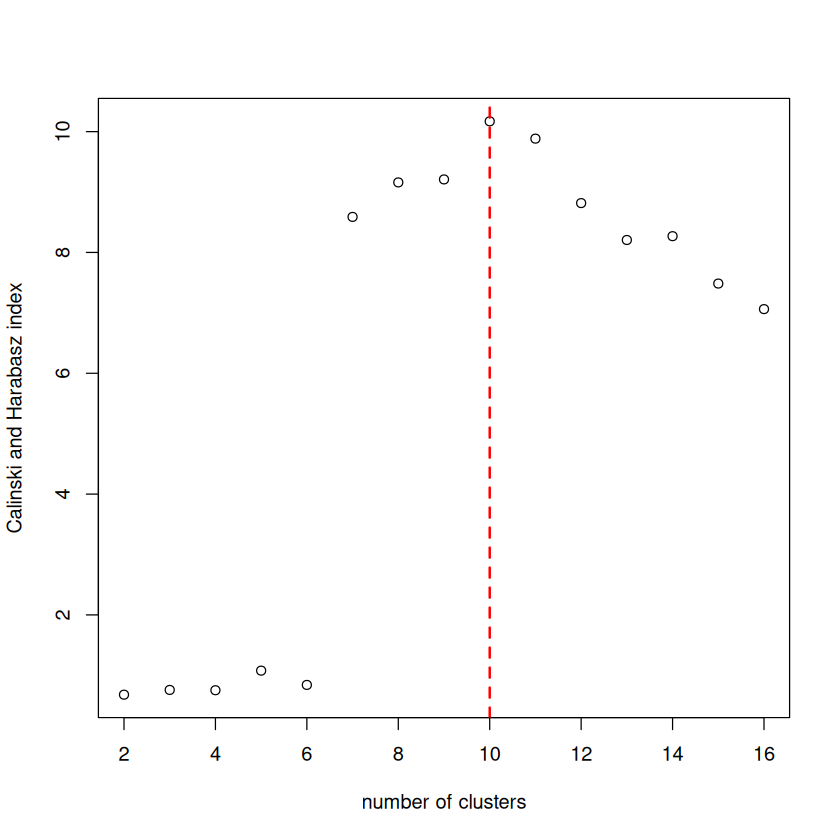

In [54]:
plot(2:16, Nb.single$All.index,               # Plot index values (y) vs. number of clusters (x from 2 to 16)
     xlab = "number of clusters",             # Label for x-axis
     ylab = "Calinski and Harabasz index")    # Label for y-axis

abline(v = 10,                               # Add a vertical dashed line at x = 10 (optimal clusters)
       col = "red",                          # Color of the line
       lty = 2,                             # Line type 2 = dashed
       lwd = 2)                             # Line width thicker for visibility


# 6 Advanced dendogram plotting (Convert hclust object to dendrogram and plot) -> *hc.dend <- as.dendrogram(hc)*, *plot(hc.dend)*

## 6.0 Advanced dendogram plotting -> *as.dendogram(hc)*, *plot (hc.dend)*

- **hc** : *hierarchical clustering object from a distance matrix*
- **hc.dend** :  *Dendogram objected from the hierarchical clustering object*

```r
# Convert hc object to dendrogram object
hc.dend <- as.dendrogram(hc)  

# Plot the dendrogram
plot(hc.dend)

In [55]:
library(dendextend)

Registered S3 method overwritten by 'dendextend':
  method     from 
  rev.hclust vegan


---------------------
Welcome to dendextend version 1.17.1
Type citation('dendextend') for how to cite the package.

Type browseVignettes(package = 'dendextend') for the package vignette.
The github page is: https://github.com/talgalili/dendextend/

Suggestions and bug-reports can be submitted at: https://github.com/talgalili/dendextend/issues
You may ask questions at stackoverflow, use the r and dendextend tags: 
	 https://stackoverflow.com/questions/tagged/dendextend

	To suppress this message use:  suppressPackageStartupMessages(library(dendextend))
---------------------



Attaching package: ‘dendextend’


The following object is masked from ‘package:permute’:

    shuffle


The following object is masked from ‘package:stats’:

    cutree




## 6.1 UPGMA clustering dendogram plotting

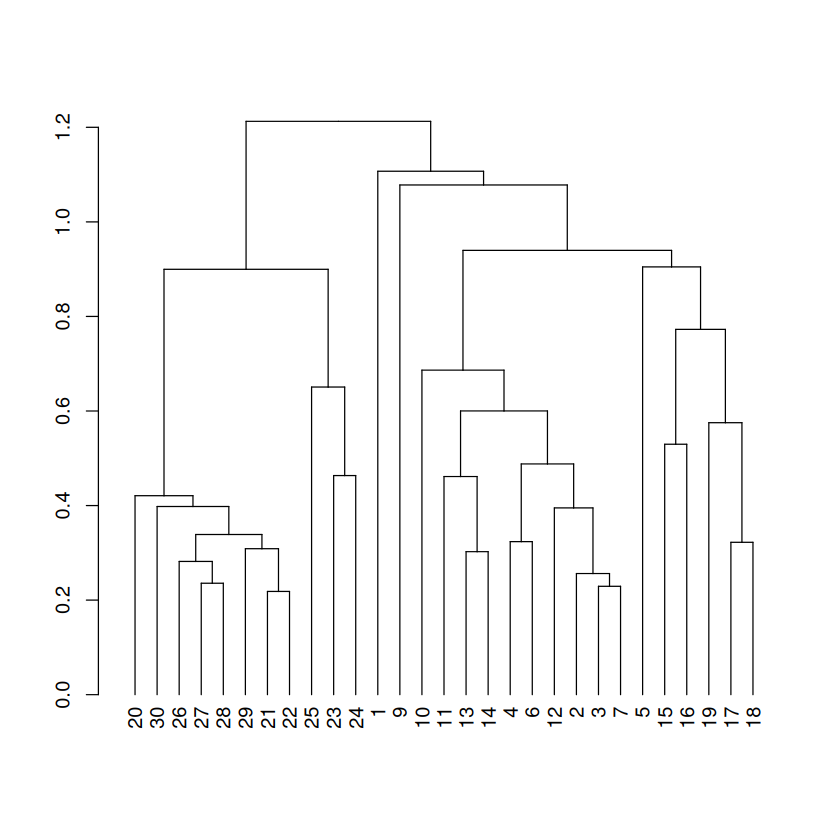

In [57]:
UPGMA.dend <- as.dendrogram(spe.ch.UPGMA)   #convert from hclust object to dendrogram
plot(UPGMA.dend)                            #plot dendrogram

## 6.2 Combination as.dendogram() & Nbclust()

### 1) Compute the dendogram from the hclustering object
**as.dendogram(hc)**  

```r
# Convert hc object to dendrogram object
hc.dend <- as.dendrogram(hc)  

```

### 2) Compute the ideal number of clusters

**Nbclust()**
```r
Nb.hc <- NbClust(
  df,                 # Data matrix
  diss = df_dist,   # Optional: precomputed distance matrix
  distance = NULL,      # NULL if using 'diss'
  min.nc = 2,           # Minimum number of clusters
  max.nc = 16,          # Maximum number of clusters
  method = "ward.D2",   # Linkage method
  index = "ch"          # Clustering quality index
)
```
### 3) Attribute the right colors to the clusters

```r
colors_to_use <- Nb.hc$Best.partition      #define colors and sort according to tips in dendrogram
colors_to_use<-colors_to_use[order.dendrogram(hc.dend)]

labels_colors(hc.dend) <- colors_to_use   #change color of tip labels depending on best partition
```
### 4) change color of branches using n (k-means) clusters
```r

#change color of branches using n (k-means) clusters
labels_colors(hc.dend)<-1
hc.dend <- hc.dend %>% color_branches(k = n)
plot(hc.dend)
```

## 6.3 Advanced plotting with UPMGA 

$All.index
      2       3       4       5       6       7       8       9      10      11 
20.5008 10.7431  7.6410  8.0089  7.0172 13.6701 13.8323 12.3052 10.5660 10.2638 
     12      13      14      15      16 
 9.7822  9.1350  8.5217  7.7464  7.3259 

$Best.nc
Number_clusters     Value_Index 
         2.0000         20.5008 

$Best.partition
 1  2  3  4  5  6  7  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25 26 27 
 1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  2  2  2  2  2  2  2  2 
28 29 30 
 2  2  2

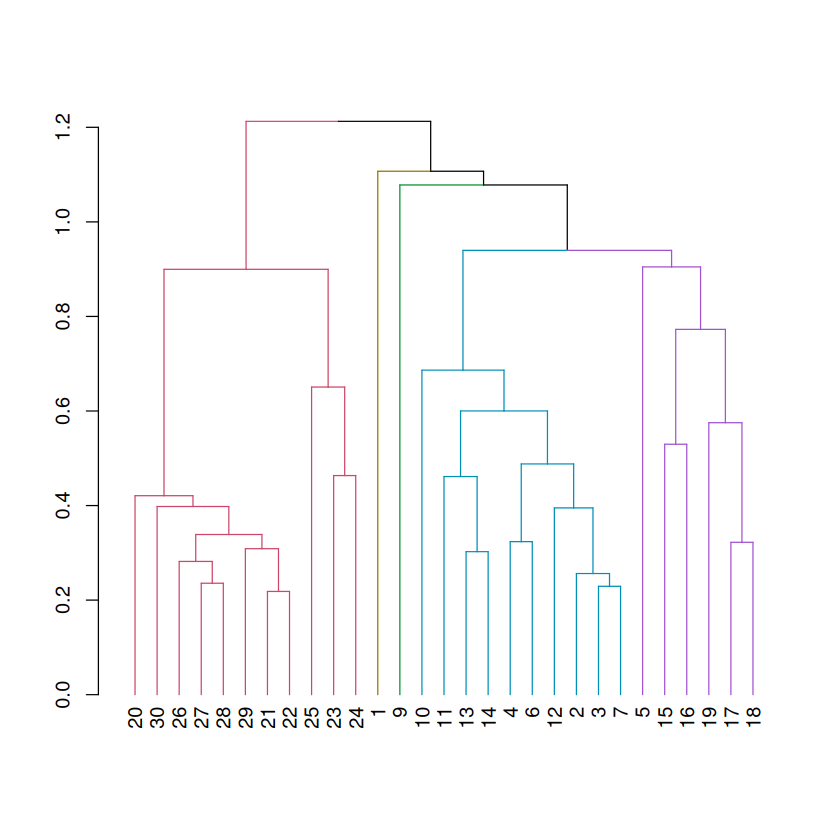

In [60]:
UPGMA.dend <- as.dendrogram(spe.ch.UPGMA)   #convert from hclust object to dendrogram                          



Nb.UPGMA<-NbClust(spe, diss=spe.ch, distance = NULL, min.nc=2, max.nc=16, 
                   method = "average", index="ch")
Nb.UPGMA      #there are 2 optimal groups.

colors_to_use <- Nb.UPGMA$Best.partition      #define colors and sort according to tips in dendrogram
colors_to_use<-colors_to_use[order.dendrogram(UPGMA.dend)]

labels_colors(UPGMA.dend) <- colors_to_use   #change color of tip labels depending on best partition


#change color of branches using 5 (k-means) clusters
labels_colors(UPGMA.dend)<-1
UPGMA.dend <- UPGMA.dend %>% color_branches(k = 5)
plot(UPGMA.dend)

# HOMEWORK : TASK 2: Use NbClust to determine the optimal number of clusters in the mite dataset (see previous task) - how does this agree with your visual assessment?